In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Notebook used for visualizations in the paper

In [3]:
masks = np.load('data/training/train_masks_n_2.npy')

melt_pond = np.count_nonzero(masks==0)
sea_ice = np.count_nonzero(masks==1)
ocean = np.count_nonzero(masks==2)

print(melt_pond, sea_ice, ocean)

327877 1650222 556301


In [5]:
print(melt_pond/(melt_pond+sea_ice+ocean), sea_ice/(melt_pond+sea_ice+ocean), ocean/(melt_pond+sea_ice+ocean))

0.12937065972222223 0.6511292613636364 0.21950007891414142


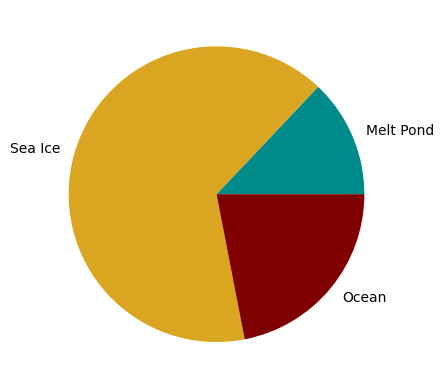

1650222


In [4]:
x = np.array([melt_pond, sea_ice, ocean])
label = ["Melt Pond", "Sea Ice", "Ocean"]

plt.pie(x, labels=label, colors=['darkcyan', 'goldenrod', 'maroon'])
plt.show()

print(sea_ice)

In [2]:
ds = nc.Dataset('data/prediction/raw/220718_2/IRdata_ATWAICE_processed_220718_142920.nc')

ims = ds.variables['Ts'][:]

In [3]:
timestamps = ds.variables['time'][:]

In [4]:
print(timestamps[2780])

55274.0


In [18]:
#!pip install pandas
#!pip install timedelta

import pandas as pd
from datetime import timedelta

def extract_time(img_idx, timestamps, flight_nr):
    """
    Convert the timestamp for an image.

    Parameters:
    ----------
        img_idx : int
        timestamps : numpy.ma.core.MaskedArray
    """
    reference = '2022-07-18 00:00:00'

    times = pd.Series(timestamps)
    date = pd.Timestamp(reference)
    time = str(date + timedelta(seconds=int(times[img_idx])))

    return time

In [26]:
print(extract_time(2420, timestamps,2))

2022-07-18 15:15:14


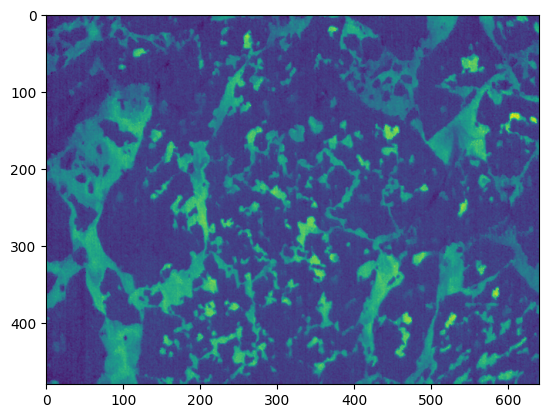

In [28]:
plt.imshow(ims[2416])

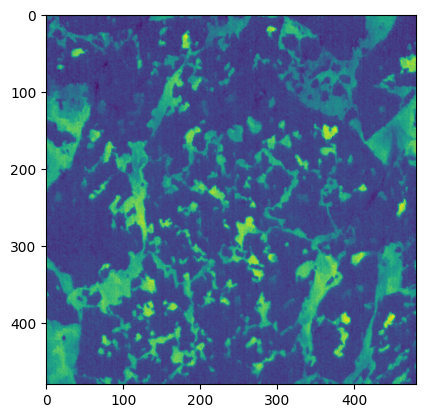

In [6]:
vis = cv2.imread('vis.jpg')
masks = np.load('data/training/train_masks_n_2.npy')
mask = masks[0]

images = np.load('data/training/train_images_n_2.npy')
img = images[0]

plt.imshow(img)

In [ ]:
ds = nc.Dataset('data/prediction/raw/220718_2/IRdata_ATWAICE_processed_220718_142920.nc')
data = ds.variables['Ts'][:]

In [7]:
from scripts.utils import crop_center_square

img = crop_center_square(ims[2416])

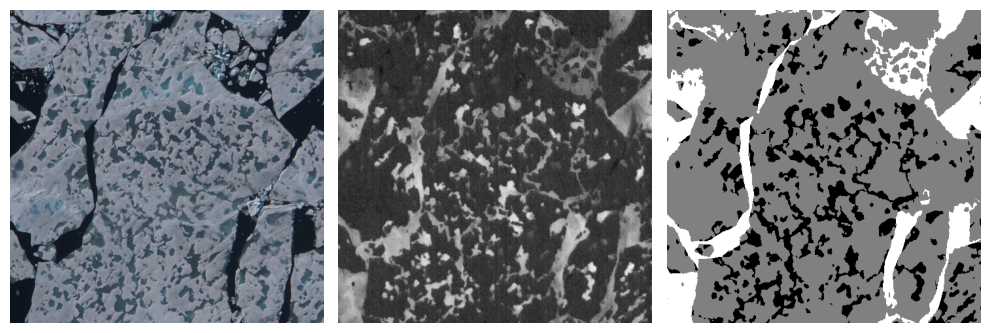

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(10, 30))

ax[0].imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
ax[0].set_axis_off()
#ax[0].imshow(img, cmap='gray')

#plt.colorbar(ax[0].imshow(img, cmap='gray'), ax=ax[0])
#ax[0].set_axis_off()

# Show the colorbar to the left
#cbar = plt.colorbar(ax[0].imshow(img, cmap='gray'), ax=ax[0], fraction=0.03, pad=0.04)  # Adjust fraction and pad
#cbar.ax.tick_params(labelsize=8)  # Optional: Adjust tick label font size
ax[1].imshow(img, cmap='gray')
ax[1].set_axis_off()
ax[1].set_axis_off()

ax[2].imshow(mask, cmap='gray')
ax[2].set_axis_off()

plt.tight_layout()

plt.show()

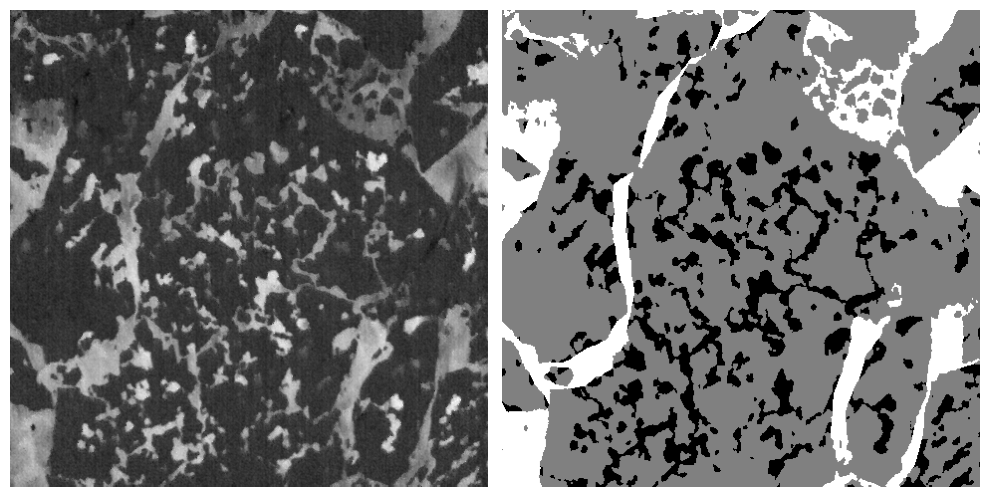

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))

#ax[0].imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
#ax[0].set_axis_off()
#ax[0].imshow(img, cmap='gray')

#plt.colorbar(ax[0].imshow(img, cmap='gray'), ax=ax[0])
#ax[0].set_axis_off()

# Show the colorbar to the left
#cbar = plt.colorbar(ax[0].imshow(img, cmap='gray'), ax=ax[0], fraction=0.03, pad=0.04)  # Adjust fraction and pad
#cbar.ax.tick_params(labelsize=8)  # Optional: Adjust tick label font size
ax[0].imshow(img, cmap='gray')
ax[0].set_axis_off()
ax[0].set_axis_off()

ax[1].imshow(mask, cmap='gray')
ax[1].set_axis_off()

plt.tight_layout()

plt.show()